In [1]:
# importing neccesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("G:/csv_files/Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# watching the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# data cleaning
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# checking the unique values (cardinality) of catogorical columns, in future we can change it to 1's and 0's also
for column in df.columns:
    if df[column].dtypes=="object":
        print(column,"----------",df[column].unique())

customerID ---------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ---------- ['Female' 'Male']
Partner ---------- ['Yes' 'No']
Dependents ---------- ['No' 'Yes']
PhoneService ---------- ['No' 'Yes']
MultipleLines ---------- ['No phone service' 'No' 'Yes']
InternetService ---------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---------- ['No' 'Yes' 'No internet service']
OnlineBackup ---------- ['Yes' 'No' 'No internet service']
DeviceProtection ---------- ['No' 'Yes' 'No internet service']
TechSupport ---------- ['No' 'Yes' 'No internet service']
StreamingTV ---------- ['No' 'Yes' 'No internet service']
StreamingMovies ---------- ['No' 'Yes' 'No internet service']
Contract ---------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---------- ['Yes' 'No']
PaymentMethod ---------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ---------- ['29.85' '1889.5' '108.15' ... '346.45'

In [6]:
# replaced the redundant values 
df["MultipleLines"].replace("No phone service","No",inplace=True)
df["OnlineSecurity"].replace("No internet service","No",inplace=True)
df["OnlineBackup"].replace("No internet service","No",inplace=True)
df["DeviceProtection"].replace("No internet service","No",inplace=True)
df["TechSupport"].replace("No internet service","No",inplace=True)
df["StreamingTV"].replace("No internet service","No",inplace=True)
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [7]:
# once again checking
for column in df.columns:
    if df[column].dtypes=="object":
        print(column,"----------",df[column].unique())

customerID ---------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ---------- ['Female' 'Male']
Partner ---------- ['Yes' 'No']
Dependents ---------- ['No' 'Yes']
PhoneService ---------- ['No' 'Yes']
MultipleLines ---------- ['No' 'Yes']
InternetService ---------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---------- ['No' 'Yes']
OnlineBackup ---------- ['Yes' 'No']
DeviceProtection ---------- ['No' 'Yes']
TechSupport ---------- ['No' 'Yes']
StreamingTV ---------- ['No' 'Yes']
StreamingMovies ---------- ['No' 'Yes']
Contract ---------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---------- ['Yes' 'No']
PaymentMethod ---------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ---------- ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ---------- ['No' 'Yes']


<AxesSubplot:xlabel='gender', ylabel='count'>

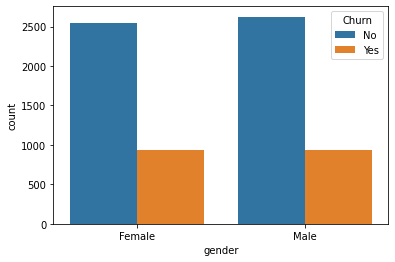

In [10]:
# doing some data visvalisation
sns.countplot( x=df["gender"],hue=df["Churn"])
# the graph shows gender has no influence over the ratio of churn that's the company is not so baised with gender

In [8]:
df["MonthlyCharges"].describe()
# from below max.monthly charges is 118 and min monthly charges is 30

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [9]:
df["monthlycharges_above_mean()"]=df["MonthlyCharges"].apply(lambda x:True if x>65 else False)
# considering them as decent customers

<Figure size 720x360 with 0 Axes>

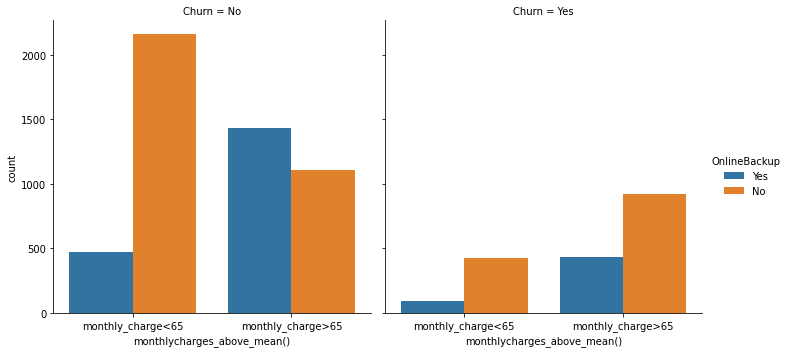

<Figure size 720x360 with 0 Axes>

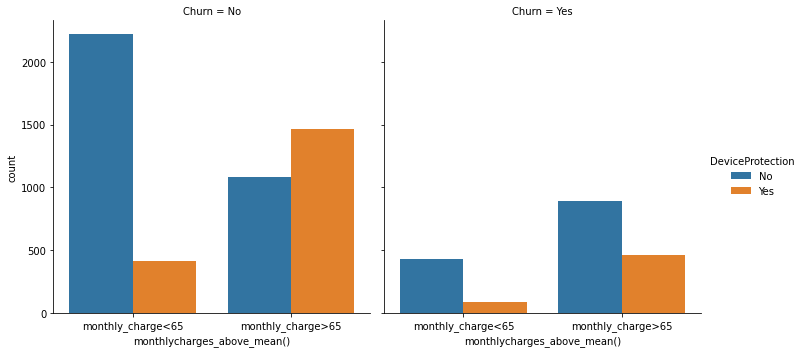

<Figure size 720x360 with 0 Axes>

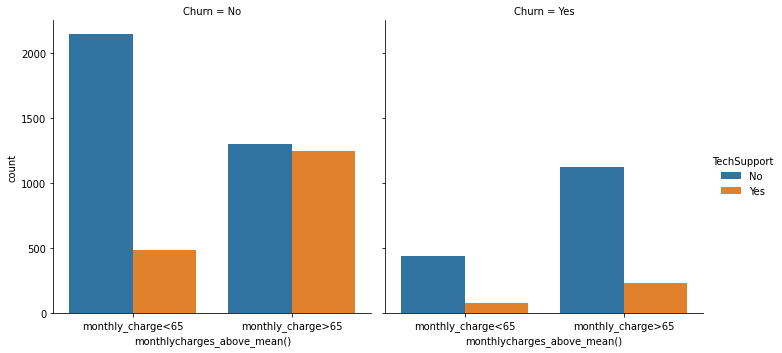

<Figure size 720x360 with 0 Axes>

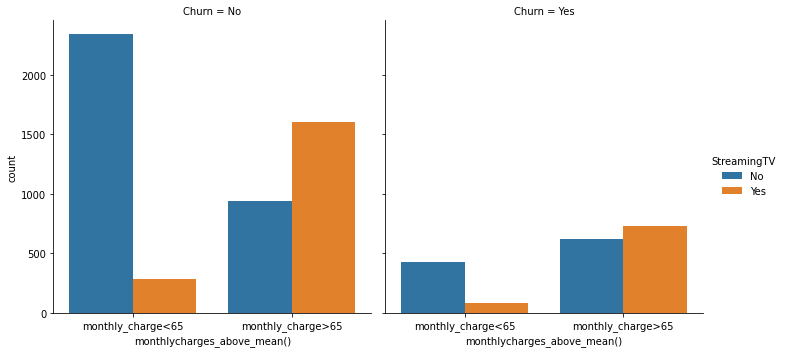

<Figure size 720x360 with 0 Axes>

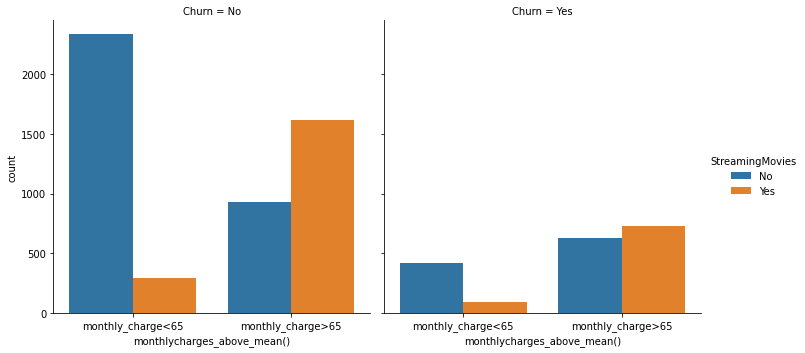

<Figure size 720x360 with 0 Axes>

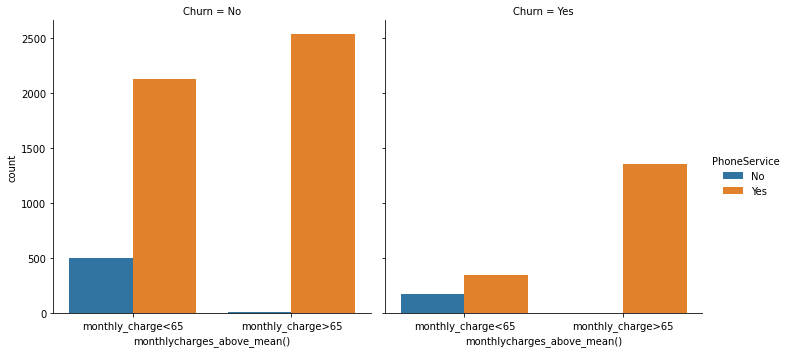

<Figure size 720x360 with 0 Axes>

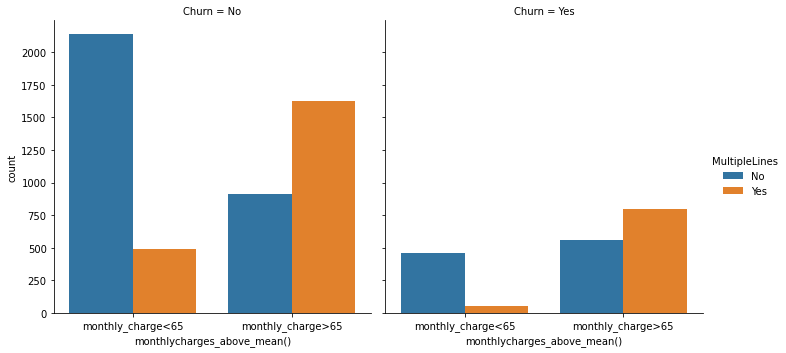

<Figure size 720x360 with 0 Axes>

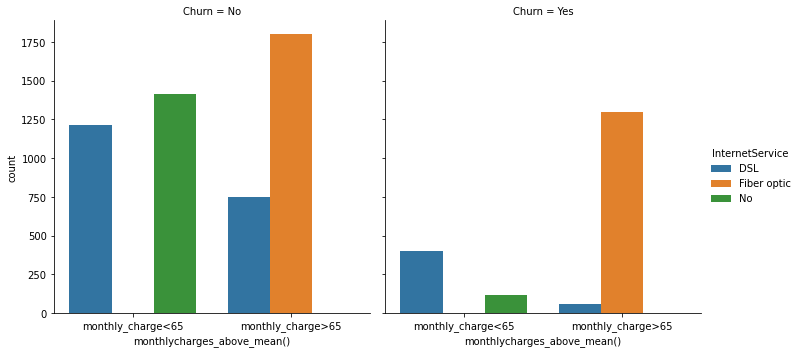

In [13]:
# checking the people consumed their other features 
for i in ["OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",\
                                 "PhoneService","MultipleLines","InternetService"]:
    plt.figure(figsize=(10,5))
#     sns.catplot(x=df["MonthlyCharges"]>65,hue=df[i],kind="count",col=df["Churn"])
    sns.catplot(x="monthlycharges_above_mean()",hue=i,col="Churn",data=df,kind="count")
    plt.xticks(ticks=[0,1],labels=["monthly_charge<65","monthly_charge>65"])
    plt.show()
      

In [10]:
# the graph infer that people have not utilised other products of company mostlikly left 
# better the company should focus to purchase other products to keep their customers

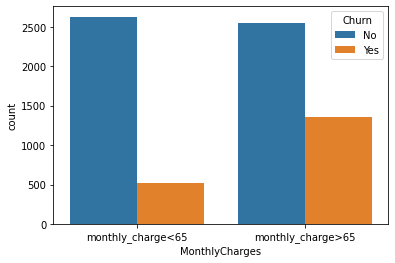

In [12]:
sns.countplot(x=df["MonthlyCharges"]>65,hue=df["Churn"])
plt.xticks(ticks=[0,1],labels=["monthly_charge<65","monthly_charge>65"])
plt.show()

#above graph is very important the ratio of people with high monthly bill paying, the percentage of churn is high 
#since they are valuable customers, we can give them free trail/subcription of other products to keep them 

for i in ["OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",\
                                 "PhoneService","MultipleLines","InternetService"]:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df["MonthlyCharges"]>65,hue=df[i])
    plt.xticks(ticks=[0,1],labels=["monthly_charge<65","monthly_charge>65"])
    plt.show()
<!--    other way of data visualisation     -->

In [13]:
# since the "TotalCharges" is string we have to change it
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [14]:
# drop nan columns
df1=df[~df["TotalCharges"].isna()]

In [15]:
# let's start data preprocessing
for column in df1.columns:
    if df[column].dtypes=="object":
        print(column,"----------",df1[column].unique())

customerID ---------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ---------- ['Female' 'Male']
Partner ---------- ['Yes' 'No']
Dependents ---------- ['No' 'Yes']
PhoneService ---------- ['No' 'Yes']
MultipleLines ---------- ['No' 'Yes']
InternetService ---------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---------- ['No' 'Yes']
OnlineBackup ---------- ['Yes' 'No']
DeviceProtection ---------- ['No' 'Yes']
TechSupport ---------- ['No' 'Yes']
StreamingTV ---------- ['No' 'Yes']
StreamingMovies ---------- ['No' 'Yes']
Contract ---------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---------- ['Yes' 'No']
PaymentMethod ---------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ---------- ['No' 'Yes']


In [16]:
df1.replace({"Yes":1,"No":0,"Female":1,"Male":0},inplace=True)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [17]:
for column in df1.columns:
#     if df1[i].dtypes=="object":
        print(column,"----------",df1[column].unique())

customerID ---------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ---------- [1 0]
SeniorCitizen ---------- [0 1]
Partner ---------- [1 0]
Dependents ---------- [0 1]
tenure ---------- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService ---------- [0 1]
MultipleLines ---------- [0 1]
InternetService ---------- ['DSL' 'Fiber optic' 0]
OnlineSecurity ---------- [0 1]
OnlineBackup ---------- [1 0]
DeviceProtection ---------- [0 1]
TechSupport ---------- [0 1]
StreamingTV ---------- [0 1]
StreamingMovies ---------- [0 1]
Contract ---------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ---------- [1 0]
PaymentMethod ---------- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges ---------- [29.85 56.9

In [18]:
for i in df1:
    if df1[i].dtypes=="object":
#         pd.get_dummies(df1,columns=[i],drop_first=True,prefix=f"{i}")
        print(i)

customerID
InternetService
Contract
PaymentMethod


In [19]:
# copy the dataframe 
df2=df1.copy()

In [20]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthlycharges_above_mean()
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,False
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,False
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,False
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,False
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,DSL,1,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,True
7039,2234-XADUH,1,0,1,1,72,1,1,Fiber optic,0,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,True
7040,4801-JZAZL,1,0,1,1,11,0,0,DSL,1,...,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,False
7041,8361-LTMKD,0,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,True


In [21]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'monthlycharges_above_mean()'],
      dtype='object')

In [22]:
# drop some of columns which does not affect the target variable 
df1.drop(["customerID","monthlycharges_above_mean()"],axis=1,inplace=True)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
df2=pd.get_dummies(df1,columns=["InternetService","Contract","PaymentMethod"],drop_first=True)

In [24]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [47]:
# lets check the skew of the columns
df2.skew()
# more than one is highly skewed so let's normalise them

gender                                   0.018776
SeniorCitizen                            1.831103
Partner                                  0.070024
Dependents                               0.880908
tenure                                   0.237731
PhoneService                            -2.729727
MultipleLines                            0.316232
OnlineSecurity                           0.944373
OnlineBackup                             0.652954
DeviceProtection                         0.657594
TechSupport                              0.925245
StreamingTV                              0.475441
StreamingMovies                          0.458191
PaperlessBilling                        -0.377503
MonthlyCharges                          -0.222103
TotalCharges                             0.961642
Churn                                    1.060622
InternetService_DSL                      0.658922
InternetService_Fiber optic              0.240682
Contract_One year                        1.429263


In [55]:
# one last thing is to normalise the data here we should drop the target variable
scale=StandardScaler()
scale.fit(df2.drop("Churn",axis=1))
df3=scale.transform(df2.drop("Churn",axis=1))

In [70]:
df3

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.633746,1.378330,-0.723918,...,0.828939,-1.161694,-0.994194,1.382243,-0.886896,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,1.577918,-0.725516,1.381372,...,-1.206361,-0.260878,-0.173740,1.382243,-0.886896,1.943495,-0.561364,-0.525351,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,1.577918,1.378330,-0.723918,...,0.828939,-0.363923,-0.959649,1.382243,-0.886896,-0.514537,-0.561364,-0.525351,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,1.577918,-0.725516,1.381372,...,-1.206361,-0.747850,-0.195248,1.382243,-0.886896,1.943495,-0.561364,-0.525351,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,0.828939,0.196178,-0.940457,-0.723462,1.127527,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.170500,1.577918,-0.725516,1.381372,...,0.828939,0.664868,-0.129180,1.382243,-0.886896,1.943495,-0.561364,-0.525351,-0.711863,1.839576
7028,1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,-0.633746,1.378330,1.381372,...,0.828939,1.276493,2.241056,-0.723462,1.127527,1.943495,-0.561364,1.903490,-0.711863,-0.543604
7029,1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,-0.854336,1.577918,-0.725516,-0.723918,...,0.828939,-1.170004,-0.854514,1.382243,-0.886896,-0.514537,-0.561364,-0.525351,1.404764,-0.543604
7030,-0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.170500,-0.633746,-0.725516,-0.723918,...,0.828939,0.319168,-0.872095,-0.723462,1.127527,-0.514537,-0.561364,-0.525351,-0.711863,1.839576


In [57]:
target=df2.Churn
df3=pd.DataFrame(df3)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(df3,target,test_size=.2,random_state=42)

In [59]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [60]:
lg.score(x_test,y_test)
# score is pretty good

0.7889125799573561

In [63]:
y_predict=lg.predict(x_test)

In [64]:
y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
# confusion matrix to see the matrix truth and predicted
cm=confusion_matrix(y_test,y_predict)

In [66]:
cm

array([[917, 116],
       [181, 193]], dtype=int64)

<AxesSubplot:>

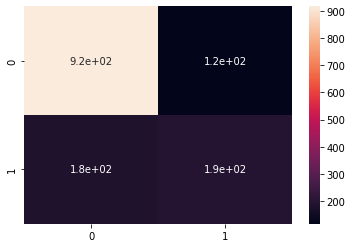

In [67]:
# for beautiful visualisation
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# HANDLING MISSING DATA

In [71]:
len(df2[df2["Churn"]==1])

1869

In [72]:
len(df2[df2["Churn"]==0])

5163

# case1: undersampling majority class

In [73]:
# majority class is churn==0
case1=df2[df2["Churn"]==0].sample(1869)

In [74]:
case_1=pd.concat([df2[df2["Churn"]==1],case1],axis=0)

In [75]:
len(case_1)

3738

In [76]:
case_1.reset_index(inplace=True)

In [77]:
inputs=case_1.drop("Churn",axis=1)
output=case_1.Churn

In [78]:
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=.2,stratify=output,random_state=42)

In [79]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_predict=lg.predict(x_test)

In [81]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       374
           1       0.70      0.76      0.73       374

    accuracy                           0.72       748
   macro avg       0.72      0.72      0.72       748
weighted avg       0.72      0.72      0.72       748



# case_2:oversampling

In [82]:
# duplicating the samples
case2=df2[df2["Churn"]==1].sample(5163,replace=True)

In [83]:
len(case2)

5163

In [84]:
case_2=pd.concat([df2[df2["Churn"]==0],case2],axis=0)
case_2.reset_index(inplace=True)
len(case_2)

10326

In [85]:
inputs=case_2.drop("Churn",axis=1)
output=case_2.Churn

In [86]:
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=.2,stratify=output,random_state=42)

In [87]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_predict=lg.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.73      1033
           1       0.73      0.79      0.76      1033

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



# case3 SMOTE

#synthetic minority oversampling technique same as over sampling
#but it adapts the k nearest algorithm

In [123]:
smote=SMOTE( sampling_strategy="minority")

In [124]:
inputs=df2.drop("Churn",axis=1)
outputs=df2["Churn"]

In [125]:
outputs.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [126]:
x_sm,y_sm= smote.fit_resample(inputs,outputs)

In [127]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=.2,stratify=y_sm,random_state=42)

In [129]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_predict=lg.predict(x_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1033
           1       0.80      0.83      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



# case4 ensemble

In [131]:
inputs=df2.drop("Churn",axis=1)
outputs=df2["Churn"]

In [132]:
df2["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [133]:
x_train,x_test,y_train,y_test=train_test_split(inputs,outputs,test_size=.2,stratify=outputs,random_state=42)

In [134]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [135]:
4130/1495

2.762541806020067

In [136]:
df4=x_train
df4["Churn"]=y_train

In [137]:
len(x_train)

5625

In [138]:
churn_yes=df4[df4.Churn==1]
churn_no=df4[df4.Churn==0]
len(churn_yes),len(churn_no)

(1495, 4130)

In [139]:
def get_batch(start,end):
    result=pd.concat([churn_no[start:end],churn_yes],axis=0)
    x_train=result.drop("Churn",axis=1)
    y_train=result.Churn
    return x_train,y_train

In [140]:
x_train,y_train=get_batch(0,1495)

In [141]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [143]:
y_predict1=lg.predict(x_test)
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



# number two

In [144]:
x_train,y_train=get_batch(1495,2990)

In [145]:
len(x_train),len(y_train)

(2990, 2990)

In [146]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
y_predict2=lg.predict(x_test)
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



# number three

In [149]:
x_train,y_train=get_batch(2990,4130)

In [150]:
len(x_train),len(y_train)

(2635, 2635)

In [151]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
y_predict3=lg.predict(x_test)
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1033
           1       0.46      0.83      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



y_final= y_predict1+ y_predict2+ y_predict3

In [155]:
y_final=y_predict1.copy()

for i in range(len(y_final)):
    if  y_predict1[i]+ y_predict2[i]+ y_predict3[i]>1:
        y_final[i]=1
    else:
        y_final[i]=0
    

In [156]:
np.unique(y_final)

array([0, 1], dtype=int64)

In [157]:
print(classification_report(y_test,y_final))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407



#best of above method is known by seeing their classification report f1-score
undersampling - f1score is .71,.73
oversampling  - f1score is .73,.76
SMOTE         - f1score is .80,.81   #in this data set SMOTE gives best values
ensemble      - f1score is .78,.61